In [ ]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations


df_2023 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2023-08.parquet")
df_2022 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2022-08.parquet")
df_2021 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2021-08.parquet")
df_2020 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2020-08.parquet")
df_2019 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2019-08.parquet")
df_2018 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2018-08.parquet")
df_2017 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2017-08.parquet")
df_2016 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2016-08.parquet")
df_2015 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2015-08.parquet")
df_2014 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2014-08.parquet")

#df_total = pd.concat([df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014], axis=1)
dataframes = [df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014]
years = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

for df, year in zip(dataframes, years):
    df.columns = [f'{col}{year}' for col in df.columns]

df_total = pd.concat(dataframes, axis=1)
print(df_total.columns)
# print(df_total['tip_amount'])
# h = [x for x in df_total['tip_amount'] if x == 0]
# print(len(h))
# pd.DataFrame.to_csv(df_total['tip_amount'][0:1000], 'df_tip.csv')
# df_total[['tip_amount', 'tpep_pickup_datetime']][0:1000].to_csv('df_tip.csv')
# pd.DataFrame.to_csv(df_total['tip_amount'][0:1000].mean(), 'df_tip_mean.csv')

columns_to_export = [f'{col}{year}' for year in years for col in ['tip_amount', 'tpep_pickup_datetime', 'PULocationID', 'DOLocationID']]
df_total[columns_to_export][0:1000].to_csv('df_tip.csv')



(Text(0.5, 0, 'Index'), Text(0, 0.5, 'Tip amount'))

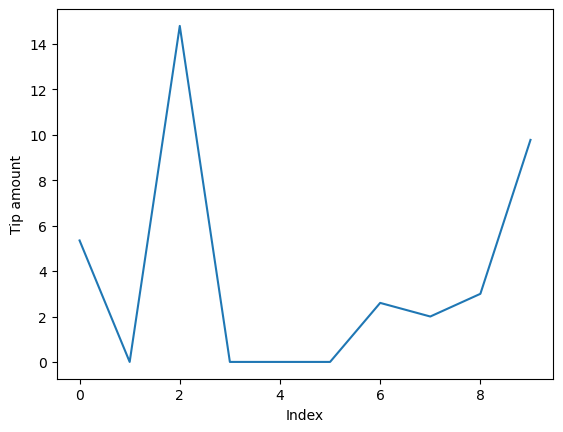

In [11]:
plt.plot(df_total['tip_amount2023'][0:10])
plt.xlabel('Index'), plt.ylabel('Tip amount')


In [ ]:

import networkx as nx

# Create an empty graph
G = nx.Graph()
count = 0
# Iterate over DataFrame rows
for index, row in df_total.iterrows():
    # Get the nodes and weight
    pickup_location = row['PULocationID2014']
    dropoff_location = row['DOLocationID2014']
    tip_amount = row['tip_amount2014']
    count += 1
    print(count)
    # If the edge already exists, add the tip amount to the weight
    if G.has_edge(pickup_location, dropoff_location):
        G[pickup_location][dropoff_location]['weight'] += tip_amount
    # If the edge does not exist, create it and set the weight to the tip amount
    else:
        G.add_edge(pickup_location, dropoff_location, weight=tip_amount)


# def make_pairs(temp_list):
#     temp_list=list(temp_list)
#     temp_list.sort()
#     pairs=list(combinations(temp_list,2))
#     return pairs

# def count_pairs(author_list):
#     unique_pairs = {}
#     for author_pair in author_list:
#         sorted_author_pair = sorted(author_pair)
#         sorted_author_pair_tuple = tuple(sorted_author_pair)
#         if sorted_author_pair_tuple in unique_pairs:
#             unique_pairs[sorted_author_pair_tuple] += 1
#         else:
#             unique_pairs[sorted_author_pair_tuple] = 1
#     unique_author_list = [[list(author_pair), count] for author_pair, count in unique_pairs.items()]
#     return unique_author_list

# G = nx.Graph()
# # count = 0
# # for pair in pairs:
# #     G.add_edge(pair[0][0],pair[0][1],attr=pair[1])
# #     count += 1
# #     print(str(count) + " : "+str(len(pairs)))

: 